# 1. Selection

Para a realização deste projeto, foram utilizados dois conjuntos de dados do Poscomp. 

O primeiro, com dados até 2022, foi usado especificamente na etapa de seleção, pois é o único que possui a quantidade de acertos por área de conhecimento, informação essencial para a criação de visualizações pertinentes.

Para todas as demais etapas, utilizou-se o dataset mais recente, atualizado até 2023.

In [2]:
import gdown

url = 'https://drive.google.com/file/d/1sE-NyGLtPT1EDZ3hKNntGOTCoM-cDfXO'
output = '../data/raw/poscomp_2022.csv'
gdown.download(id='1sE-NyGLtPT1EDZ3hKNntGOTCoM-cDfXO', output=output, quiet=False)

url = 'https://drive.google.com/file/d/11mqLIrbTTpvIUtde90Z201oIAGGK45Fb'
output = '../data/raw/poscomp_2023.csv'
gdown.download(id='11mqLIrbTTpvIUtde90Z201oIAGGK45Fb', output=output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1sE-NyGLtPT1EDZ3hKNntGOTCoM-cDfXO
To: /home/koheiseko/Documents/projects/poscomp-classification/data/raw/poscomp_2022.csv
100%|██████████| 2.41M/2.41M [00:01<00:00, 2.19MB/s]
Downloading...
From: https://drive.google.com/uc?id=11mqLIrbTTpvIUtde90Z201oIAGGK45Fb
To: /home/koheiseko/Documents/projects/poscomp-classification/data/raw/poscomp_2023.csv
100%|██████████| 1.27M/1.27M [00:00<00:00, 1.39MB/s]


'../data/raw/poscomp_2023.csv'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
poscomp = pd.read_csv('../data/raw/poscomp_2022.csv')

In [16]:
poscomp.head(5)

,idade,sexo,estado,presença,cargo,especialidade,algoritmos_e_estruturas_de_dados,analise_combinatoria,analise_de_algoritmos,arquitetura_e_organizacao_de_computadores,...,redes_de_computadores,sistemas_distribuidos,sistemas_operacionais,teoria_dos_grafos,tecnicas_de_programacao,algebra_linear,ano,matematica,fund_computacao,tec_computacao
0,1989-11-29,masculino,ce,s,mestrado/doutorado,teoria da computação,1.0,1.0,1.0,1.0,...,1.0,2.0,2.0,3.0,3.0,2.0,2016,14.0,21.0,10.0
1,1995-02-23,masculino,rs,s,mestrado/doutorado,metodologias e técnicas de computação,3.0,2.0,2.0,1.0,...,2.0,3.0,2.0,3.0,3.0,3.0,2016,16.0,22.0,12.0
2,1991-12-13,masculino,sp,s,mestrado/doutorado,engenharia de software,1.0,0.0,2.0,1.0,...,1.0,2.0,2.0,2.0,3.0,1.0,2016,4.0,16.0,8.0
3,1986-09-29,masculino,pa,s,mestrado/doutorado,sistemas de informação,2.0,0.0,1.0,0.0,...,2.0,1.0,0.0,2.0,3.0,1.0,2016,4.0,13.0,7.0
4,1997-12-26,feminino,am,s,mestrado/doutorado,computação gráfica,2.0,1.0,1.0,0.0,...,1.0,3.0,2.0,2.0,3.0,2.0,2016,6.0,15.0,11.0


## Sumário

- **idade**: data de nascimento de cada candidato.

- **sexo**: gênero de cada candidato. 

- **estado**: estado de origem de cada candidato.

- **presença**: presença na relização da prova.

- **cargo**: cargo de cada candidato.

- **especialidade**: campo informado pelo candidato no ato da inscrição, indica um conjunto de áreas computacionais que o candidato tem interesse em pesquisar, caso seja aprovado em um programa de pós-graduação.

- **ano**: ano em que a prova foi aplicada. 

- **coluna 7 até a 34**: quantidade de acertos divididas em assuntos.

- **matemática, fundamentos da computação e tecnologia da computação**: são colunas derivadas dos acertos divididos em assuntos, em que cada coluna possui valores numéricos correspondentes aos acertos nas áreas abordadas.

In [27]:
print(f'O dataset possui {poscomp.shape[0]} linhas e {poscomp.shape[1]} colunas.')

O dataset possui 13997 linhas e 35 colunas.


In [30]:
poscomp.describe().T

,count,mean,std,min,25%,50%,75%,max
algoritmos_e_estruturas_de_dados,11366.0,1.636196,0.955438,0.0,1.0,2.0,2.0,3.0
analise_combinatoria,11366.0,1.188369,0.893527,0.0,1.0,1.0,2.0,3.0
analise_de_algoritmos,11366.0,1.700598,1.026363,0.0,1.0,2.0,3.0,3.0
arquitetura_e_organizacao_de_computadores,11366.0,0.918529,0.783607,0.0,0.0,1.0,1.0,3.0
banco_de_dados,11366.0,0.911490,0.778447,0.0,0.0,1.0,1.0,3.0
calculo_diferencial_e_integral,11366.0,1.102939,0.835190,0.0,1.0,1.0,2.0,3.0
circuitos_digitais,11366.0,1.241950,0.857083,0.0,1.0,1.0,2.0,3.0
compiladores,11366.0,0.576632,0.640388,0.0,0.0,0.0,1.0,2.0
computacao_grafica,11366.0,0.505983,0.606686,0.0,0.0,0.0,1.0,2.0
engenharia_de_software,11366.0,1.051029,0.894053,0.0,0.0,1.0,2.0,3.0


In [32]:
poscomp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13997 entries, 0 to 13996
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   idade                                           13997 non-null  object 
 1   sexo                                            13997 non-null  object 
 2   estado                                          13997 non-null  object 
 3   presença                                        13997 non-null  object 
 4   cargo                                           13997 non-null  object 
 5   especialidade                                   13997 non-null  object 
 6   algoritmos_e_estruturas_de_dados                11366 non-null  float64
 7   analise_combinatoria                            11366 non-null  float64
 8   analise_de_algoritmos                           11366 non-null  float64
 9   arquitetura_e_organizacao_de_computador

In [33]:
poscomp.isna().sum().sort_values(ascending=False)

analise_de_algoritmos                             2631
arquitetura_e_organizacao_de_computadores         2631
algoritmos_e_estruturas_de_dados                  2631
sistemas_operacionais                             2631
teoria_dos_grafos                                 2631
tecnicas_de_programacao                           2631
analise_combinatoria                              2631
banco_de_dados                                    2631
compiladores                                      2631
circuitos_digitais                                2631
calculo_diferencial_e_integral                    2631
engenharia_de_software                            2631
geometria_analitica                               2631
inteligencia_artificial                           2631
computacao_grafica                                2631
linguagens_de_programacao                         2631
matematica_discreta                               2631
logica_matematica                                 2631
linguagens

Os dados nulos existentes no dataset são dos candidatos que não realizaram a prova. Portanto, o conjunto de dados se encontra sem dados ausentes para aqueles que realizaram a prova.

In [34]:
poscomp[poscomp['presença'] == 'n']['presença'].count()

np.int64(2630)

In [35]:
poscomp['estado'].value_counts().head(10)

estado
sp    2856
mg    1677
rs    1270
pr    1069
ce     748
pb     747
sc     739
pa     696
ms     556
go     544
Name: count, dtype: int64

In [36]:
poscomp['ano'].unique()

array([2016, 2017, 2018, 2019, 2022])

In [34]:
poscomp['sexo'].value_counts()

sexo
masculino    11630
feminino      2367
Name: count, dtype: int64

Text(0.5, 1.0, '2022')

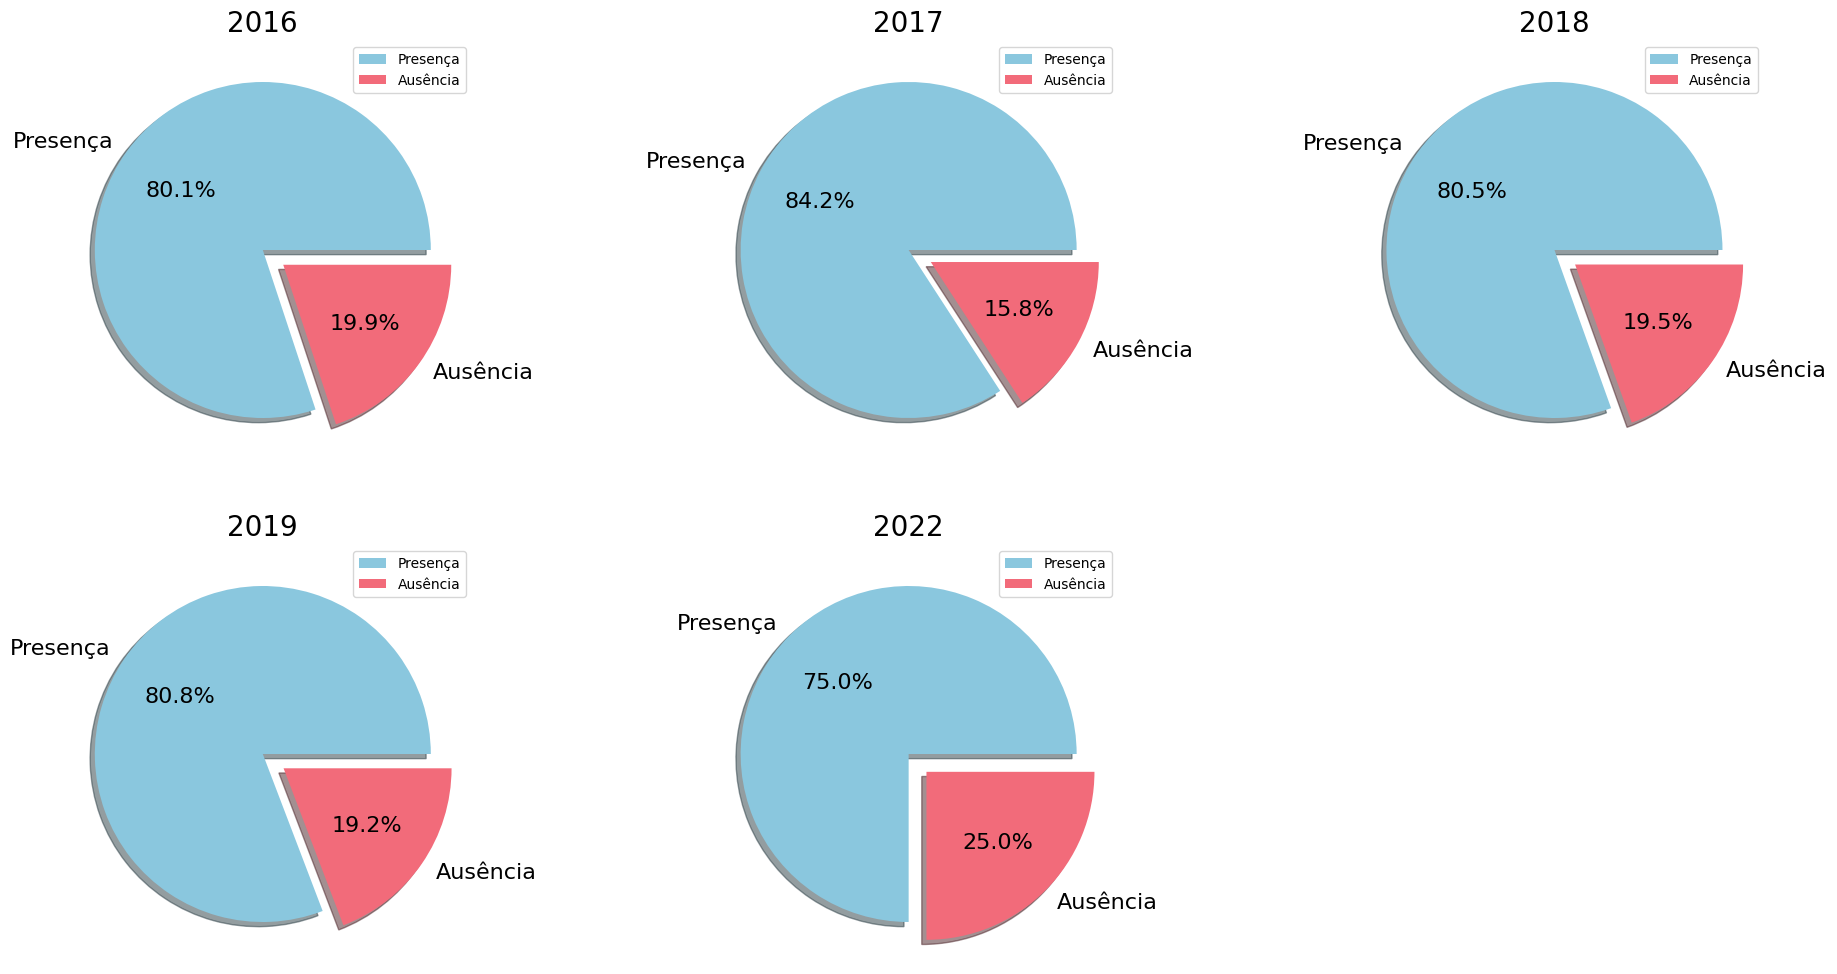

In [35]:
presence_year = poscomp[poscomp['presença'] == 's'].groupby('ano')['presença'].count()
absence_year = poscomp[poscomp['presença'] == 'n'].groupby('ano')['presença'].count()

fig, axs = plt.subplots(2, 3, figsize=(25, 12))

fig.subplots_adjust(wspace=0)
fig.delaxes(axs[1, 2])

labels = ['Presença', 'Ausência']
explode = [0, 0.15]
colors = ['#8ac7de', '#f26b7a']

axs[0, 0].pie([presence_year[2016], absence_year[2016]], labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, colors=colors, textprops={'fontsize': 16})
axs[0, 0].legend()
axs[0, 0].set_title('2016', fontsize=20)

axs[0, 1].pie([presence_year[2017], absence_year[2017]], labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, colors=colors, textprops={'fontsize': 16})
axs[0, 1].legend()
axs[0, 1].set_title('2017', fontsize=20)

axs[0, 2].pie([presence_year[2018], absence_year[2018]], labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, colors=colors, textprops={'fontsize': 16})
axs[0, 2].legend()
axs[0, 2].set_title('2018', fontsize=20)

axs[1, 0].pie([presence_year[2019], absence_year[2019]], labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, colors=colors, textprops={'fontsize': 16})
axs[1, 0].legend()
axs[1, 0].set_title('2019', fontsize=20)

axs[1, 1].pie([presence_year[2022], absence_year[2022]], labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, colors=colors, textprops={'fontsize': 16})
axs[1, 1].legend()
axs[1, 1].set_title('2022', fontsize=20)

Text(0, 0.5, 'Assuntos')

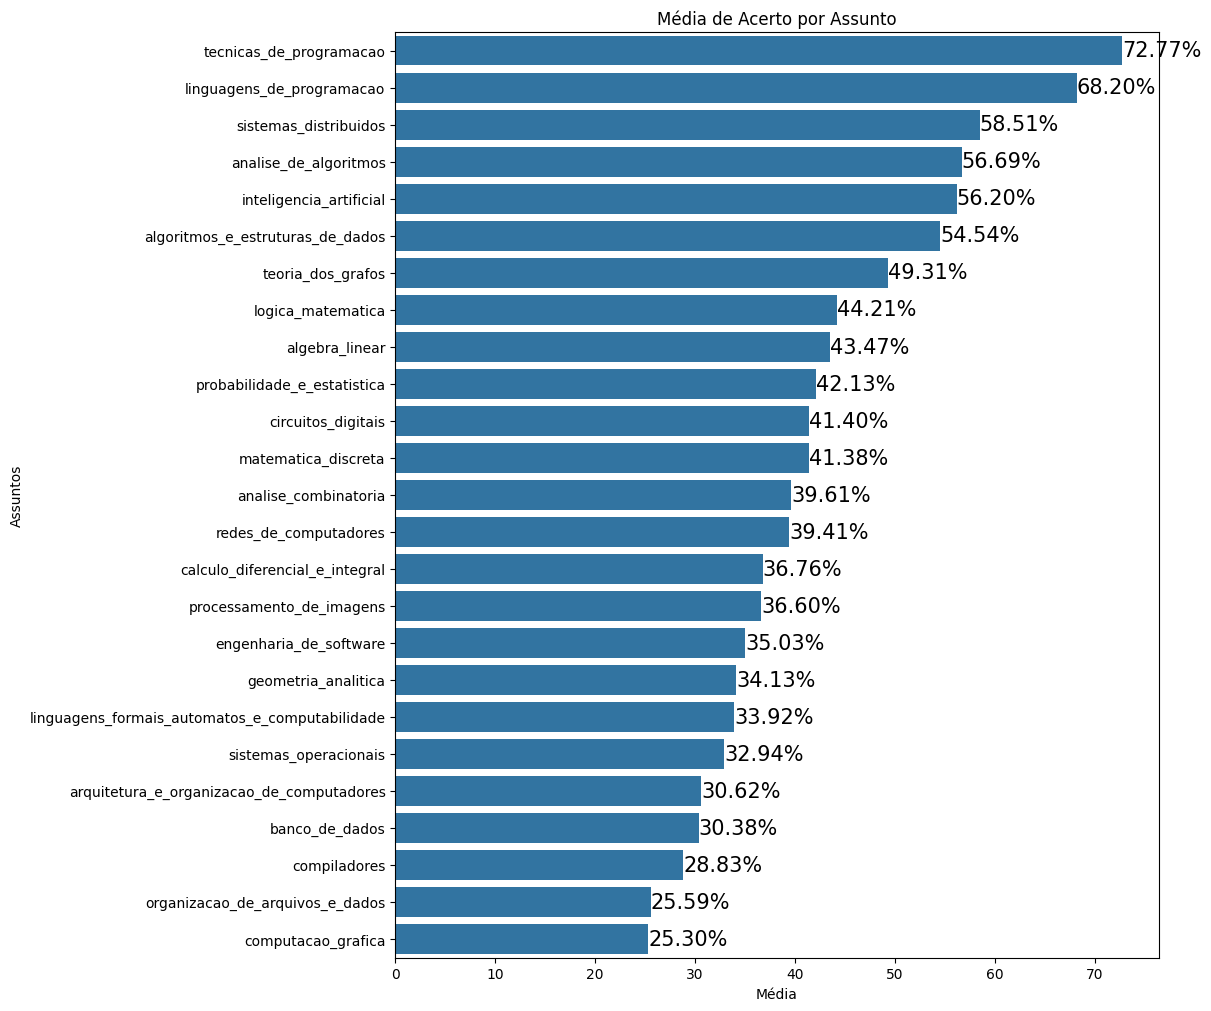

In [56]:
media_por_assunto_viz = poscomp.iloc[:, 6:31].melt().groupby('variable')['value'].agg(['mean', 'max']).reset_index()
media_por_assunto_viz['media'] = media_por_assunto_viz['mean'] / media_por_assunto_viz['max'] * 100
media_por_assunto_viz.sort_values('media', ascending=False, inplace=True)

plt.figure(figsize=(12, 10), constrained_layout=True)
plt.title('Média de Acerto por Assunto')

ax = sns.barplot(media_por_assunto_viz, y='variable', x='media', orient='h')
ax.bar_label(ax.containers[0], fontsize=15, fmt='%.2f%%')
ax.set_xlabel('Média')
ax.set_ylabel('Assuntos')

<Axes: title={'center': 'Linha de Pesquisa Mais Frequente em Cada Estado'}, xlabel='Estados', ylabel='Contagem'>

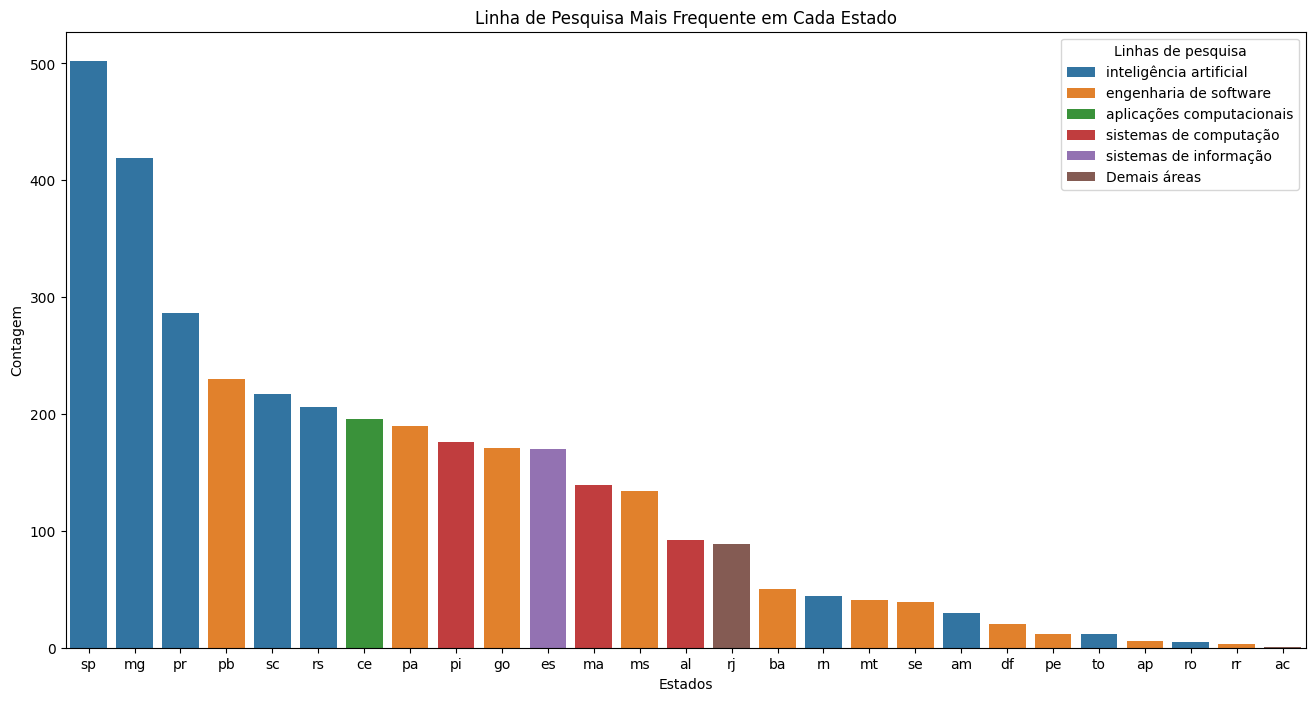

In [ ]:
contagem_por_estado_viz = poscomp.groupby(['estado', 'especialidade'])[['especialidade']].count().rename(columns={'especialidade': 'quantidade'}).reset_index()

idx = contagem_por_estado_viz.groupby('estado')['quantidade'].idxmax()

contagem_por_estado_viz = contagem_por_estado_viz.loc[idx].sort_values(by='quantidade', ascending=False)

contagem_por_estado_viz.rename(columns={'quantidade':'Contagem', 'estado': 'Estados', 'especialidade': 'Linhas de pesquisa'}, inplace=True)

plt.figure(figsize=(16, 8))
plt.title('Linha de Pesquisa Mais Frequente em Cada Estado')
sns.barplot(contagem_por_estado_viz, x='Estados', y='Contagem', hue='Linhas de pesquisa')

Text(0.5, 1.02, 'Correlações Entre Matemática, Fund. de Computação e Tec. de Computação')

<Figure size 2000x1800 with 0 Axes>

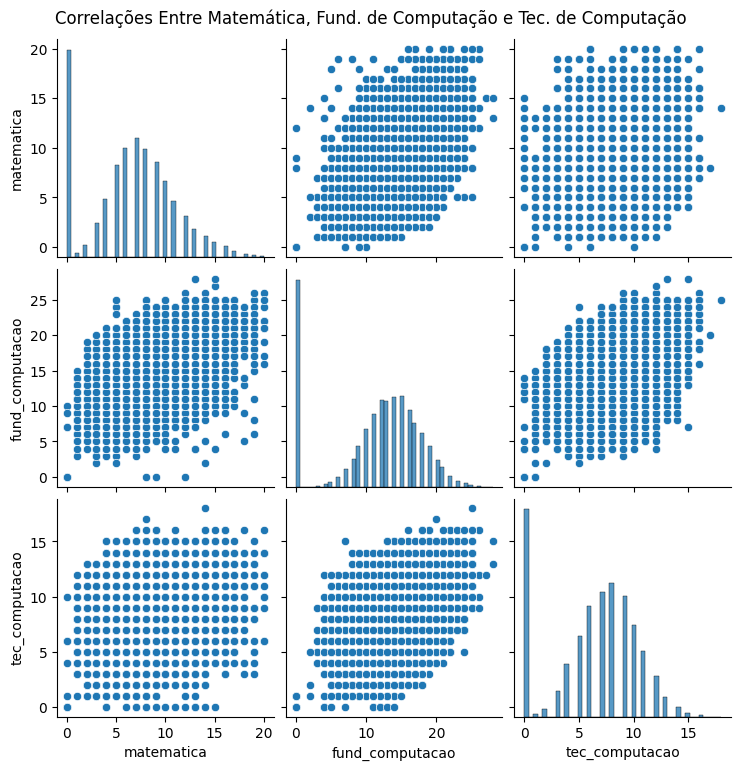

In [74]:
plt.figure(figsize=(20, 18))

g = sns.pairplot(data=poscomp, vars=['matematica', 'fund_computacao', 'tec_computacao'])

g.figure.suptitle('Correlações Entre Matemática, Fund. de Computação e Tec. de Computação', y=1.02)